<a href="https://colab.research.google.com/github/HongYeongPyo/first-repository/blob/master/02_EDA_hong_250603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`DataPreprocessing`

- (기존)정신건강 데이터의 기초 구조와 분포를 파악하는 탐색적 분석(EDA) 과정
        - 주요 관심 변수: gender, age_group, urban_rural, city
        - 시각화 (barplot, boxplot 등)
        - 변수 간 관계 분석 (상관관계, 그룹 비교)
        - 모델링 준비 (결측치 처리, 인코


- 라이프스타일에 관한 추가분석

| 변수명                  | 설명                  | 분석 방법 예시       |
| -------------------- | ------------------- | -------------- |
| `sleep_duration`     | 하루 평균 수면시간          | 평균 비교, boxplot |
| `dietary_habits`     | 식습관 유형 (정상식/정크푸드 등) | 범주형 비율 비교      |
| `work_study_hours`   | 하루 근무/학업 시간         | 도시별 평균 비교      |
| `academic_pressure`  | 학업 스트레스 지표          | 수치형 상관분석       |
| `job_satisfaction`   | 직무 만족도 (0\~10 척도)   | 도시/성별/연령대 비교   |
| `study_satisfaction` | 학업 만족도              | 만족도 비교         |


In [ ]:
# 01

import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### load Data

In [ ]:
# PATH = '/Users/kwonkyoungmi/workspaces/workspace_Python/Git_AtAiffel/datathon/data/MentalHealth'
# data = pd.read_csv(os.path.join(PATH,'df_6000(3).csv'))

In [ ]:
# 02

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 폴더 경로만 설정
DATA_PATH = '/content/drive/MyDrive/content/dataton'

# CSV 파일 불러오기
import pandas as pd
import os

data = pd.read_csv(
    os.path.join(DATA_PATH, 'df_final.csv'),
    index_col=0,
    parse_dates=True
)

# 확인
data.head()



Mounted at /content/drive


<ipython-input-2-e7097797a184>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(


,name,gender,age,age_group,city,profession,cgpa,degree,work_study_pressure,work_study_satisfaction,financial_stress,sleep_duration,dietary_habits,work_study_hours,family_mh_history,suicidal_thoughts,depression,urban_rural
id,,,,,,,,,,,,,,,,,,
1,Vivan,0,26.0,26-35,Varanasi,teacher,0.0,LLB,4.0,3.0,3.0,insufficient,Unhealthy,7.0,0,1,1,rural
3,Yuvraj,0,22.0,18-25,Mumbai,teacher,0.0,BBA,5.0,1.0,1.0,insufficient,Moderate,10.0,1,1,1,urban
5,Vani,1,59.0,56-65,Ahmedabad,financial analyst,0.0,MCA,2.0,5.0,5.0,insufficient,Healthy,7.0,0,0,0,urban
8,Aishwarya,1,24.0,18-25,Bangalore,student,5.9,BSc,2.0,5.0,2.0,insufficient,Moderate,3.0,1,0,0,urban
10,Utkarsh,0,55.0,46-55,Rajkot,software engineer,0.0,BSc,3.0,2.0,4.0,optimal,Moderate,6.0,1,0,0,rural


In [ ]:
# 03

# 결측값 확인
data.isnull().sum()

,0
name,0
gender,0
age,0
age_group,0
city,0
profession,0
cgpa,0
degree,0
work_study_pressure,0
work_study_satisfaction,0


In [ ]:
# 04
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51880 entries, 1 to 140698
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     51880 non-null  object 
 1   gender                   51880 non-null  int64  
 2   age                      51880 non-null  float64
 3   age_group                51880 non-null  object 
 4   city                     51880 non-null  object 
 5   profession               51880 non-null  object 
 6   cgpa                     51880 non-null  float64
 7   degree                   51880 non-null  object 
 8   work_study_pressure      51880 non-null  float64
 9   work_study_satisfaction  51880 non-null  float64
 10  financial_stress         51880 non-null  float64
 11  sleep_duration           51880 non-null  object 
 12  dietary_habits           51880 non-null  object 
 13  work_study_hours         51880 non-null  float64
 14  family_mh_history        5

In [ ]:
# 05
data['gender'].value_counts()

,count
gender,
0,29425
1,22455


In [ ]:
05_2
data['age_group'].value_counts()

,count
age_group,
46-55,14140
36-45,12243
26-35,9393
18-25,9082
56-65,7022


## 데이터 탐색하기

In [ ]:
# 06
data.columns

Index(['name', 'gender', 'age', 'age_group', 'city', 'profession', 'cgpa',
       'degree', 'work_study_pressure', 'work_study_satisfaction',
       'financial_stress', 'sleep_duration', 'dietary_habits',
       'work_study_hours', 'family_mh_history', 'suicidal_thoughts',
       'depression', 'urban_rural'],
      dtype='object')

In [ ]:
# 07
data.describe()

,gender,age,cgpa,work_study_pressure,work_study_satisfaction,financial_stress,work_study_hours,family_mh_history,suicidal_thoughts,depression
count,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000
mean,0.432826,40.373439,1.518318,3.048265,2.980127,3.000702,6.272899,0.499480,0.494256,0.184426
std,0.495472,12.438310,3.139421,1.395562,1.398014,1.415004,3.836287,0.500005,0.499972,0.387835
min,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,0.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,0.000000,42.000000,0.000000,3.000000,3.000000,3.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,0.000000,4.000000,4.000000,4.000000,10.000000,1.000000,1.000000,0.000000
max,1.000000,60.000000,10.000000,5.000000,5.000000,5.000000,12.000000,1.000000,1.000000,1.000000


In [ ]:
# 08
data.groupby('urban_rural')['city'].value_counts()

urban_rural  city     
rural        Meerut       5522
             Rajkot       5204
             Srinagar     5065
             Agra         4681
             Varanasi     4600
urban        Ahmedabad    5605
             Mumbai       4964
             Hyderabad    4491
             Bangalore    4119
             Chennai      4041
             Delhi        3588
Name: count, dtype: int64

In [ ]:
# 09
data.urban_rural.value_counts()

,count
urban_rural,
urban,26808
rural,25072


### 조사인구특성
- urban_rural 기준으로 "gender, age_group, profession, degree"의 빈도수와 비율을 계산하여 비교 - 막대 그래프, 파이 차트, 스택 바 차트       
- 동일성 검정 (카이제곱검정)        

In [ ]:
# 10
demo = ['gender','age_group','urban_rural','degree']
urban = data[data['urban_rural'] == 'urban']
rural = data[data['urban_rural'] == 'rural']

In [ ]:
# 11
import matplotlib.pyplot as plt
import seaborn as sns

df = data.copy()

target_variables = ['gender', 'age_group', 'profession', 'degree']
group_column = 'urban_rural'


In [ ]:
# 12
# 변수들의 타입 확인
df[['gender', 'age_group', 'profession', 'degree']].dtypes



,0
gender,int64
age_group,object
profession,object
degree,object


In [ ]:
# 13
# 빈도수, 비율 - 'gender', 'age_group', 'profession', 'degree'

cols = ['gender', 'age_group', 'profession', 'degree']


for col in cols:
    print("\n" + col.upper() + " - Frequency and proportion of variables:")


    # 빈도수
    counts = df[col].value_counts()

    # 비율
    ratios = df[col].value_counts(normalize=True) * 100

    # 데이터프레임으로 결합
    freq_table = pd.DataFrame({'Count': counts, 'Ratio (%)': ratios.round(2)})

    # 출력
    print(freq_table)



GENDER - Frequency and proportion of variables:
        Count  Ratio (%)
gender                  
0       29425      56.72
1       22455      43.28

AGE_GROUP - Frequency and proportion of variables:
           Count  Ratio (%)
age_group                  
46-55      14140      27.26
36-45      12243      23.60
26-35       9393      18.11
18-25       9082      17.51
56-65       7022      13.54

PROFESSION - Frequency and proportion of variables:
                        Count  Ratio (%)
profession                              
student                 10181      19.62
teacher                  9114      17.57
unemployed               3422       6.60
content writer           2822       5.44
architect                1744       3.36
consultant               1598       3.08
hr manager               1507       2.90
doctor                   1159       2.23
business analyst         1145       2.21
entrepreneur             1136       2.19
pharmacist               1130       2.18
chef             

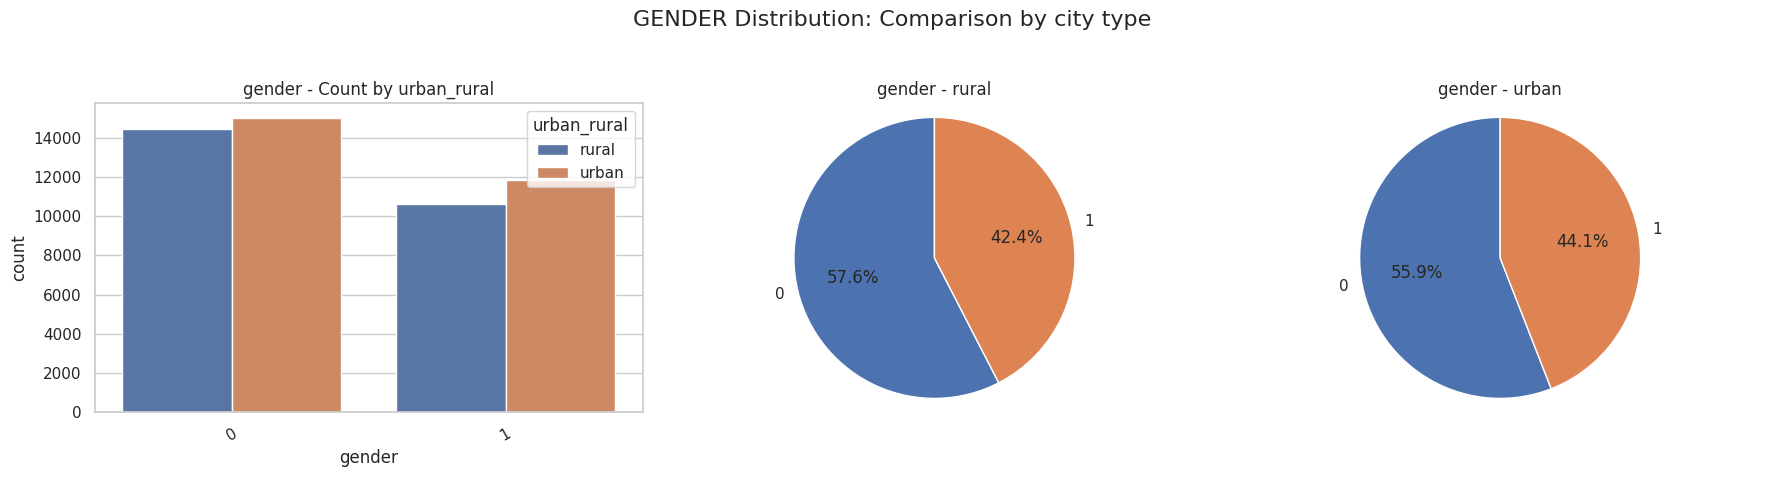

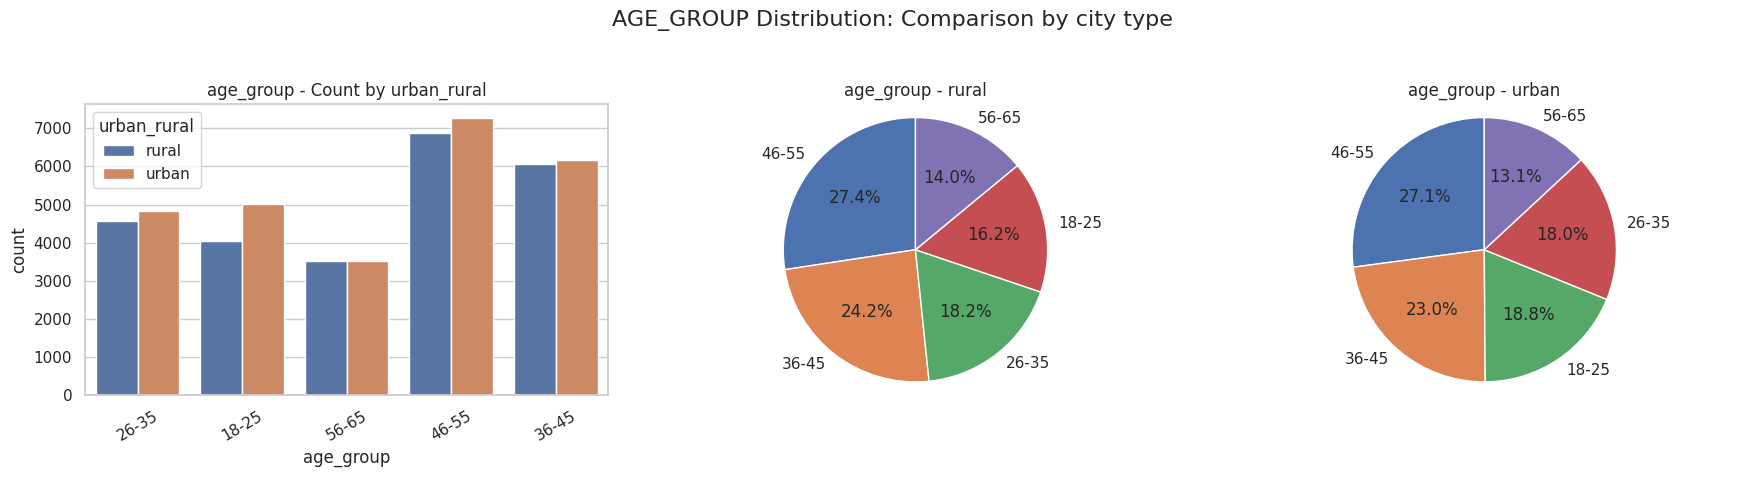

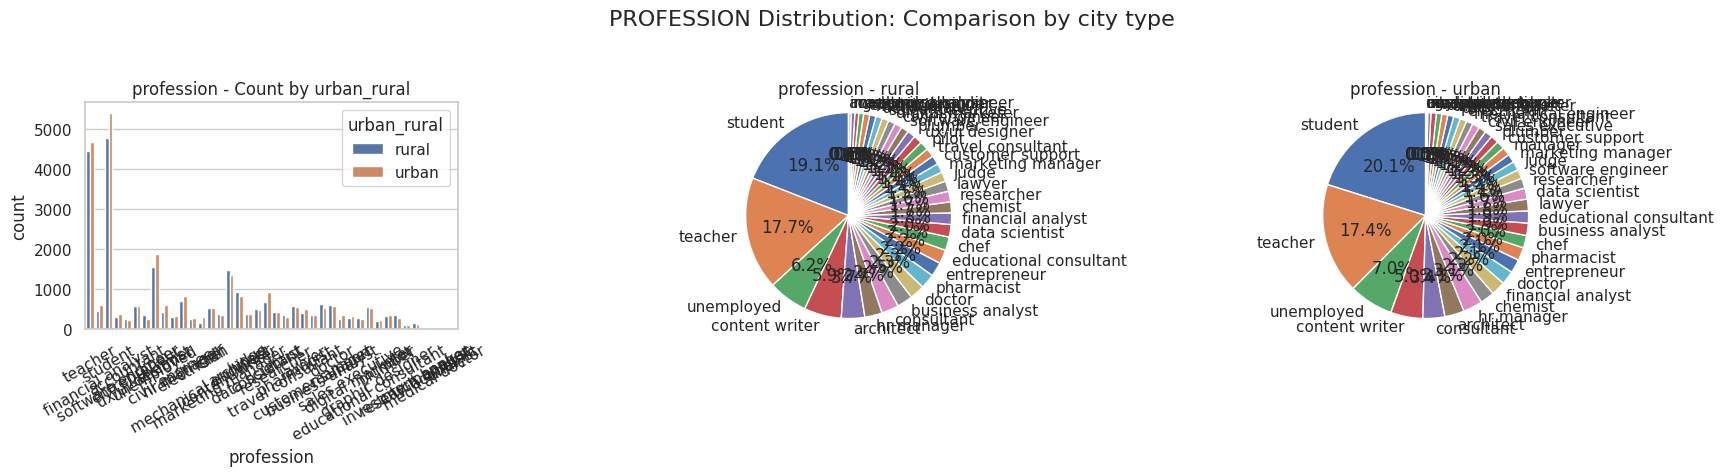

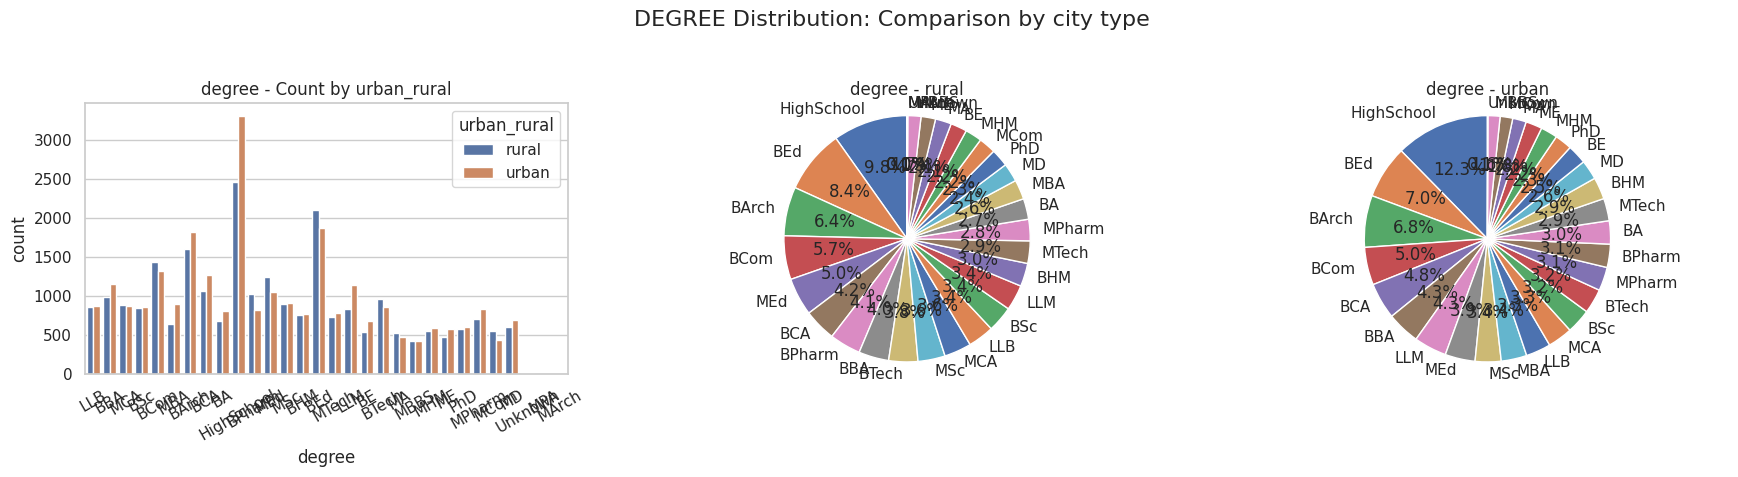

In [ ]:
# 14
# var, pie 그래프 - 'gender', 'age_group', 'profession', 'degree'

import matplotlib.pyplot as plt
import seaborn as sns

def plot_graphs_by_group(df, target_vars, group_col):
    for var in target_vars:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # [1] 막대그래프 - 도시유형별 빈도 비교
        sns.countplot(x=var, hue=group_col, data=df, ax=axes[0])
        axes[0].set_title(f'{var} - Count by {group_col}')
        axes[0].tick_params(axis='x', rotation=30)

        # [2][3] 파이차트 - 도시유형별 내부 구성비 비교
        group_values = df[group_col].unique()
        for i, group in enumerate(group_values):
            sub_data = df[df[group_col] == group]
            pie_data = sub_data[var].value_counts()
            axes[i+1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
            axes[i+1].set_title(f'{var} - {group}')
            axes[i+1].axis('equal')

        plt.suptitle(f'{var.upper()} Distribution: Comparison by city type', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


target_variables = ['gender', 'age_group', 'profession', 'degree']
group_column = 'urban_rural'
plot_graphs_by_group(df, target_variables, group_column)


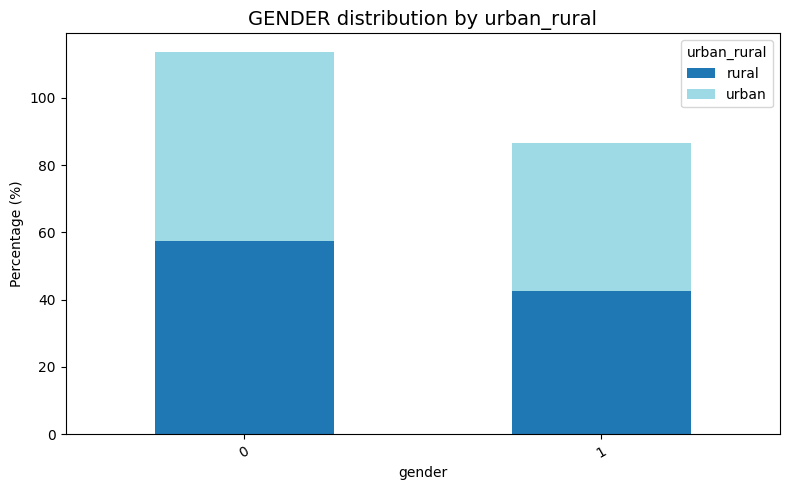

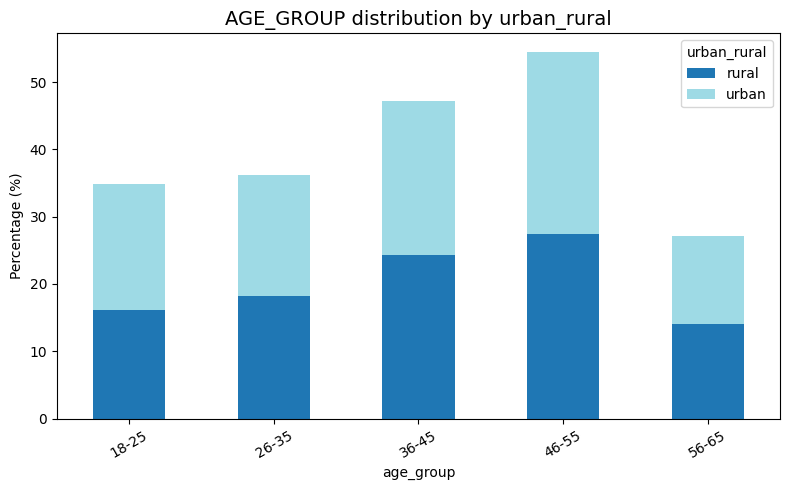

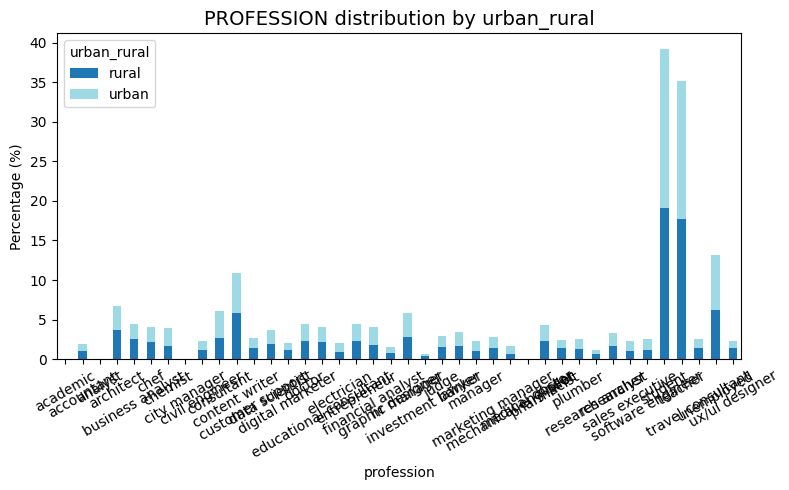

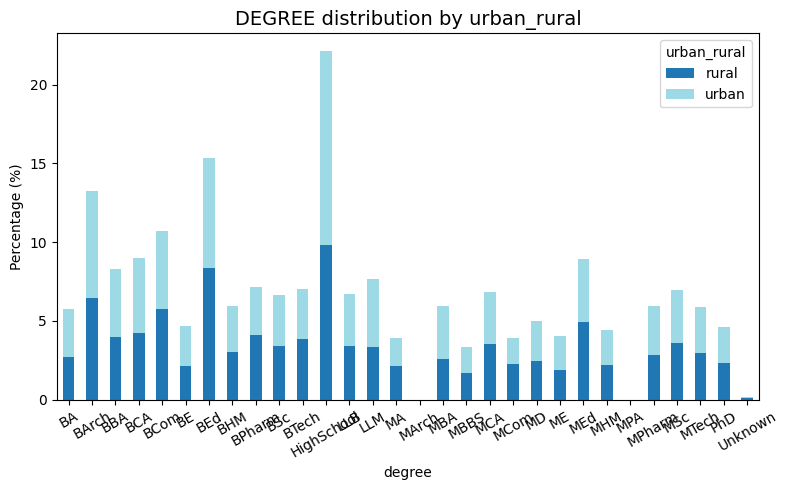

In [ ]:
# 15
# stacked_bar 그래프 - 'gender', 'age_group', 'profession', 'degree'
import pandas as pd
import matplotlib.pyplot as plt

# 대상 변수 및 그룹 기준 정의
target_vars = ['gender', 'age_group', 'profession', 'degree']
group_col = 'urban_rural'

# 스택 바 차트 함수 정의
def plot_stacked_bar_by_group(df, target_vars, group_col):
    for var in target_vars:
        # 교차표 생성: 각 group_col 값에 대한 비율 계산
        ctab = pd.crosstab(df[var], df[group_col], normalize='columns') * 100

        # 스택 바 차트 출력
        ctab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab20')
        plt.title(f'{var.upper()} distribution by {group_col}', fontsize=14)
        plt.xlabel(var)
        plt.ylabel('Percentage (%)')
        plt.legend(title=group_col)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

# 실행
plot_stacked_bar_by_group(df, target_vars, group_col)


#### 동일성 검정

In [ ]:
# 16
# 카이제곱 -  'gender', 'age_group', 'profession', 'degree'

def chi2_test(dataframe, group_col, target_col, alpha=0.05):
    """
    Perform Chi-squared test of independence between two categorical variables.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        group_col (str): The column name for the grouping variable.
        target_col (str): The column name for the target variable.
        alpha (float): Significance level for the test (default is 0.05)

    if p_value < alpha: two colums are significantly related. = diffrent distribution
       p_value > alpha: two colums are not significantly related. = similar distribution
    """

    # 그룹 컬럼의 고유 값 확인 (두 개여야 함)
    unique_groups = dataframe[group_col].unique()
    group1_name, group2_name = unique_groups[0], unique_groups[1]

    # Create contingency table
    import pandas as pd
    from scipy.stats import chi2_contingency
    contingency_table = pd.crosstab(dataframe[group_col], dataframe[target_col])

    # Perform Chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\n카이제곱 통계량: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")

    # 검정 결과 해석
    if p_value < alpha:
        print(f"'{group1_name}' 그룹과 '{group2_name}' 그룹에서 '{target_col}'의 분포는 다름")
    else:
        print(f"{group1_name}' 그룹과 '{group2_name}' 그룹에서 '{target_col}'의 분포는 동일")


target_variables = ['gender', 'age_group', 'profession', 'degree']

for var in target_variables:
    chi2_test(data, 'urban_rural', var)


카이제곱 통계량: 14.3063
p-value: 0.0002
'rural' 그룹과 'urban' 그룹에서 'gender'의 분포는 다름

카이제곱 통계량: 66.4090
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'age_group'의 분포는 다름

카이제곱 통계량: 261.2390
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'profession'의 분포는 다름

카이제곱 통계량: 343.4051
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'degree'의 분포는 다름


In [ ]:
# 17
# t_test -

def independent_t_test(dataframe, group_col, target_col, alpha=0.05):
    """
    두 독립 그룹 간에 특정 연속형 변수의 평균 차이를 독립표본 t-검정으로 검정합니다.
    등분산성(Levene's test)을 먼저 확인한 후, 그 결과에 따라 적절한 t-검정을 수행합니다.

    Args:
        dataframe (pd.DataFrame): 분석할 데이터프레임
        group_col (str): 두 그룹을 나누는 기준 컬럼 (예: 'urban_rural')
                         이 컬럼은 정확히 두 개의 고유한 값을 가져야 합니다
        target_col (str): 평균 차이를 검정할 연속형 변수 컬럼 (예: 'age', 'cgpa')
        alpha (float, optional): 유의수준 (기본값: 0.05)
    """
    print(f"\n--- '{group_col}' 그룹 간 '{target_col}' 평균 차이 독립표본 t-검정 ---\n")

    from scipy import stats

    # 그룹 컬럼의 고유 값 확인
    unique_groups = dataframe[group_col].unique()

    group1_name, group2_name = unique_groups[0], unique_groups[1]

    # 각 그룹별 데이터 추출 및 결측치 제거
    group1_data = dataframe[dataframe[group_col] == group1_name][target_col].dropna()
    group2_data = dataframe[dataframe[group_col] == group2_name][target_col].dropna()

    # 그룹별 기술 통계량 (평균, 표준편차) 확인
    print(f"  '{group1_name}' 그룹 '{target_col}' 평균: {group1_data.mean():.2f}, (표준편차: {group1_data.std():.2f}, N={len(group1_data)})")
    print(f"  '{group2_name}' 그룹 '{target_col}' 평균: {group2_data.mean():.2f}, (표준편차: {group2_data.std():.2f}, N={len(group2_data)})")

    # 1. 등분산성 검정 (Levene's test)
    # 귀무가설 (H0): 두 그룹의 분산이 동일하다.
    # 대립가설 (H1): 두 그룹의 분산이 다르다.
    levene_stat, levene_p_value = stats.levene(group1_data, group2_data)
    print(f"\n  Levene's Test (등분산성 검정) => 통계량: {levene_stat:.4f}, p-value: {levene_p_value:.4f}")

    # 2. 독립표본 t-검정 수행
    # p-value가 유의수준(0.05)보다 작으면 귀무가설 기각
    if levene_p_value > alpha: # 등분산 가정이 충족될 경우 (p > alpha)
        # 등분산 가정 하에 t-검정
        t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=True)
        print("  --> 분산이 동일하다는 가정 하에 t-검정 (Equal variances assumed)")
    else: # 등분산 가정이 충족되지 않을 경우 (p <= alpha)
        # 등분산 가정을 하지 않는 웰치(Welch)의 t-검정
        t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)
        print("  --> 분산이 동일하지 않다는 가정 하에 t-검정 (Welch's t-test)")

    if p_value < alpha:
        print(f"\n t-통계량: {t_stat:.4f}, p-value ({p_value:.4f}) : '{group1_name}' 그룹과 '{group2_name}' 그룹의 '{target_col}' 평균은 통계적으로 유의미하게 다릅니다.")
    else:
        print(f"\n t-통계량: {t_stat:.4f}, p-value ({p_value:.4f}) : '{group1_name}' 그룹과 '{group2_name}' 그룹의 '{target_col}' 평균이 통계적으로 유의미하게 다르다고 말하기 어려움")


### 라이프스타일 비교 - urban_rural 그룹별 sleep_duration, dietary_habits, work_study_hours

- 라이프스타일 특성  : 평균,중앙값,표준분포 및 분포  (범주형 vs 수치형 : Box plot, Violin plot)        

- 라이프스타일 검정 (동일성)

In [ ]:
# 21
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51880 entries, 1 to 140698
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     51880 non-null  object 
 1   gender                   51880 non-null  int64  
 2   age                      51880 non-null  float64
 3   age_group                51880 non-null  object 
 4   city                     51880 non-null  object 
 5   profession               51880 non-null  object 
 6   cgpa                     51880 non-null  float64
 7   degree                   51880 non-null  object 
 8   work_study_pressure      51880 non-null  float64
 9   work_study_satisfaction  51880 non-null  float64
 10  financial_stress         51880 non-null  float64
 11  sleep_duration           51880 non-null  object 
 12  dietary_habits           51880 non-null  object 
 13  work_study_hours         51880 non-null  float64
 14  family_mh_history        5

In [ ]:
# 22
# NaN 포함 여뷰 확인

cols = ['sleep_duration', 'dietary_habits', 'work_study_hours']

for col in cols:
    unique_vals = sorted(df[col].dropna().unique())
    has_nan = df[col].isna().any()

    print(f"\n Column: {col}")
    print(f"  - Sorted unique values: {unique_vals}")
    print(f"  - Contains NaN? {has_nan}")



 Column: sleep_duration
  - Sorted unique values: ['excessive', 'insufficient', 'optimal']
  - Contains NaN? False

 Column: dietary_habits
  - Sorted unique values: ['Healthy', 'Moderate', 'Unhealthy']
  - Contains NaN? False

 Column: work_study_hours
  - Sorted unique values: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0)]
  - Contains NaN? False


In [ ]:
# 23
# 변수들 타입 확인
df[['sleep_duration', 'dietary_habits', 'work_study_hours']].dtypes


# 범주형 : sleep_duration, dietary_habits
# 수치형 : work_study_hours - > 평균, 중앙값, 표준편차

,0
sleep_duration,object
dietary_habits,object
work_study_hours,float64


In [ ]:
# 24
# 그룹별 개수 확인
print(df.groupby('urban_rural')['work_study_hours'].count())




urban_rural
rural    25072
urban    26808
Name: work_study_hours, dtype: int64


<ipython-input-42-a96924adcd6c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


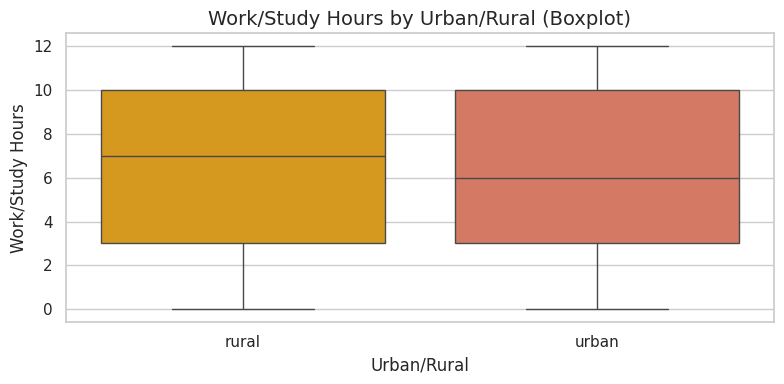

In [ ]:
# 25
# 1.  boxplot - 도시 유형별 Work/Study Hours

import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정 (색상 조절 포함)
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

# 도시 유형별 Work/Study Hours 박스플롯
sns.boxplot(
    data=df,
    x='urban_rural',
    y='work_study_hours',
    palette={'rural': '#F4A300', 'urban': '#E76F51'}  # rural=노랑, urban=주황
)

# 그래프 제목 및 축 설정
plt.title('Work/Study Hours by Urban/Rural (Boxplot)', fontsize=14)
plt.xlabel('Urban/Rural', fontsize=12)
plt.ylabel('Work/Study Hours', fontsize=12)
plt.tight_layout()
plt.show()




###  수행 결과  분석

| 항목                | Rural         | Urban       | 비교                    |
| ----------------- | ------------- | ----------- | --------------------- |
| **중앙값**           | 약 **6.8시간**   | 약 **6.0시간** |  **Rural > Urban**   |
| **상자 범위 (IQR)**   | 더 넓음          | 다소 좁음       |  Rural이 **더 다양한 분포** |
| **최댓값/최솟값**       | 둘 다 0\~12h 범위 | 유사          |                       |
| **이상치(outliers)** | 거의 없음         | 없음          | 두 집단 모두 안정적 분포        |


      - Rural(농촌) 학생/근로자들이 평균적으로 더 긴 근무·학습 시간을 가지는 경향, 하지만 분산(IQR)도 커서 집단 내 시간 격차도 더 큼
      - Urban(도시) 집단은 더 균질한 분포로, 중간값이 더 낮음

<ipython-input-43-abc5122a9e10>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='urban_rural', y='work_study_hours',
<ipython-input-43-abc5122a9e10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='urban_rural', y='work_study_hours',


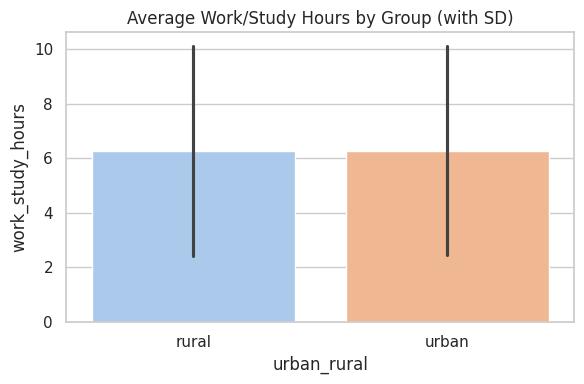

In [ ]:
# 26
# 2. Bar Plot + Errorbar - 평균 + 표준편차 또는 표준오차 비교용 - work_study_hours

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='urban_rural', y='work_study_hours',
            ci='sd', palette='pastel')

plt.title('Average Work/Study Hours by Group (with SD)')
plt.tight_layout()
plt.show()


<ipython-input-75-f37ff7fbbf97>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(data=df, x='urban_rural', y='work_study_hours',
<ipython-input-75-f37ff7fbbf97>:19: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(data=df, x='urban_rural', y='work_study_hours',
<ipython-input-75-f37ff7fbbf97>:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


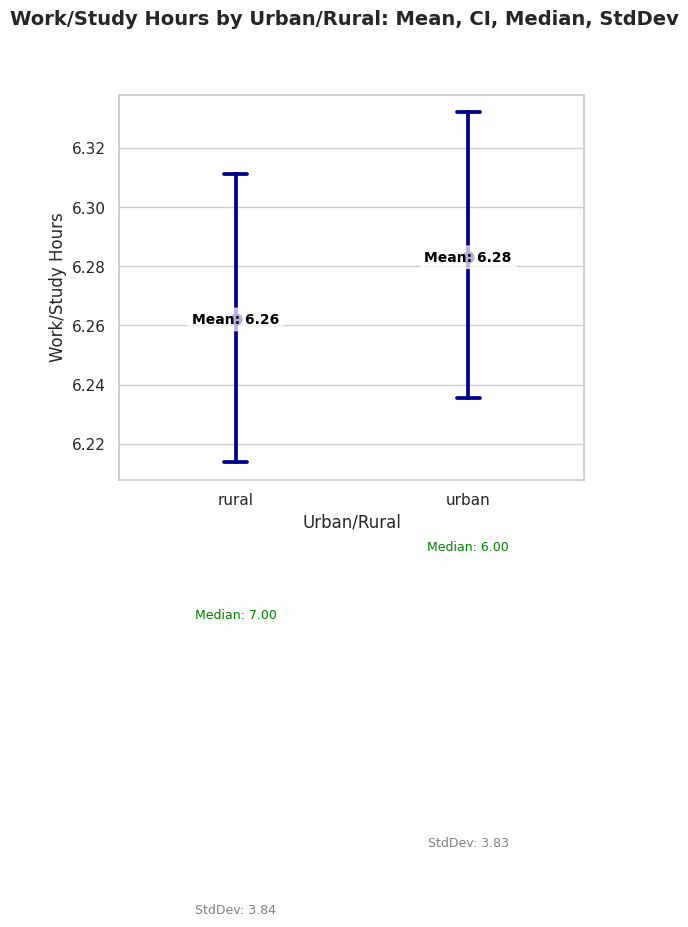

In [ ]:
# 27
# PointPlot -  work_study_hours


# 색상 정의
colors = {
    'rural': 'lightcoral',
    'urban': 'lightblue'
}


# 수치가 표시되는 PointPlot 코드
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Figure 생성
plt.figure(figsize=(6, 5))
ax = sns.pointplot(data=df, x='urban_rural', y='work_study_hours',
                   ci=95, join=False, capsize=0.1, color='darkblue')

# 통계 계산
means = df.groupby('urban_rural')['work_study_hours'].mean()
medians = df.groupby('urban_rural')['work_study_hours'].median()
stds = df.groupby('urban_rural')['work_study_hours'].std()
cis = df.groupby('urban_rural')['work_study_hours'].agg(lambda x: 1.96 * x.std()/len(x)**0.5)

# 그래프에 텍스트 표기
for i, label in enumerate(means.index):
    mean_val = means[label]
    median_val = medians[label]
    std_val = stds[label]
    ci_val = cis[label]

    # 가운데 점: 평균값과 "Mean"
    ax.text(i, mean_val, f'Mean: {mean_val:.2f}',
            ha='center', va='center', fontsize=10, fontweight='bold', color='black',
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

    # 중앙값 표기
    ax.text(i, mean_val - ci_val - 0.05, f'Median: {median_val:.2f}',
            ha='center', va='top', fontsize=9, color='green')

    # 표준편차 표기
    ax.text(i, mean_val - ci_val - 0.15, f'StdDev: {std_val:.2f}',
            ha='center', va='top', fontsize=9, color='gray')

# 제목을 최상단에
plt.suptitle('Work/Study Hours by Urban/Rural: Mean, CI, Median, StdDev',
             fontsize=14, weight='bold', y=1.05)

# 축 설정
plt.xlabel('Urban/Rural')
plt.ylabel('Work/Study Hours')
plt.tight_layout()
plt.show()



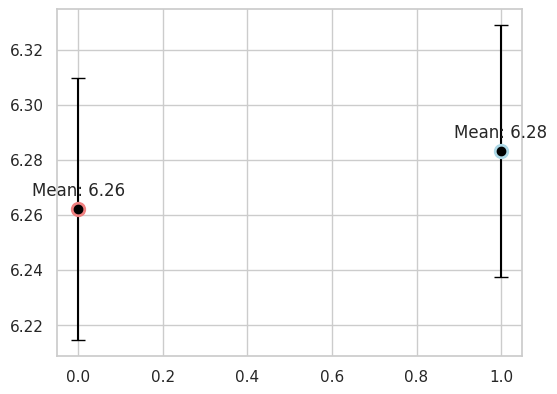

In [ ]:
# 27-2

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# 1. 데이터 전처리 (df에 work_study_hours와 urban_rural 컬럼이 존재한다고 가정)
grouped = df.groupby('urban_rural')['work_study_hours']

means = grouped.mean()
stds = grouped.std()
medians = grouped.median()
counts = grouped.count()

# 2. 신뢰구간 (95%) 계산
conf_intervals = {}
for group in means.index:
    se = sem(df[df['urban_rural'] == group]['work_study_hours'])
    ci = t.ppf(0.975, df=counts[group] - 1) * se
    conf_intervals[group] = (means[group] - ci, means[group] + ci)

# 3. 시각화
fig, ax = plt.subplots(figsize=(6, 4.5))

# x축 위치와 색상 정의 (rural부터 시작)
x_pos = {'rural': 0, 'urban': 1}
colors = {'rural': 'lightcoral', 'urban': 'lightblue'}

for group in ['rural', 'urban']:
    x = x_pos[group]
    mean = means[group]
    ci = mean - conf_intervals[group][0]
    std = stds[group]
    median = medians[group]

    # 평균 및 신뢰구간
    ax.errorbar(x, mean, yerr=ci, fmt='o', color='black', capsize=5)
    ax.plot(x, mean, 'o', markersize=10, color=colors[group])

    # 평균 표시
    ax.text(x, mean + 0.005, f"Mean: {mean:.2f}", ha='center')



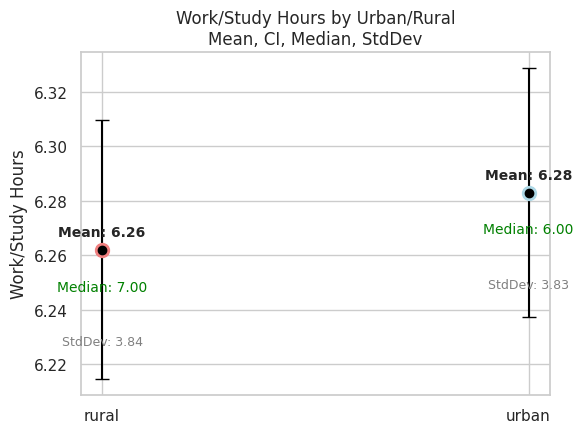

In [ ]:
# 27_3

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# 1. 통계값 계산
grouped = df.groupby('urban_rural')['work_study_hours']
means = grouped.mean()
stds = grouped.std()
medians = grouped.median()
counts = grouped.count()

# 2. 95% 신뢰구간 계산
conf_intervals = {}
for group in means.index:
    se = sem(df[df['urban_rural'] == group]['work_study_hours'])
    ci = t.ppf(0.975, df=counts[group] - 1) * se
    conf_intervals[group] = (means[group] - ci, means[group] + ci)

# 3. 시각화
fig, ax = plt.subplots(figsize=(6, 4.5))

# x축 위치 및 색상 정의
x_labels = ['rural', 'urban']
x_pos = [0, 1]
colors = {'rural': 'lightcoral', 'urban': 'lightblue'}

for i, group in enumerate(x_labels):
    x = x_pos[i]
    mean = means[group]
    ci = mean - conf_intervals[group][0]
    std = stds[group]
    median = medians[group]

    # 평균 및 신뢰구간 에러바
    ax.errorbar(x, mean, yerr=ci, fmt='o', color='black', capsize=5)
    ax.plot(x, mean, 'o', markersize=10, color=colors[group])

    # 평균 텍스트
    ax.text(x, mean + 0.005, f"Mean: {mean:.2f}", ha='center', fontsize=10, fontweight='bold')

    # 중앙값 텍스트
    ax.text(x, mean - 0.015, f"Median: {median:.2f}", ha='center', fontsize=10, color='green')

    # 표준편차 텍스트
    ax.text(x, mean - 0.035, f"StdDev: {std:.2f}", ha='center', fontsize=9, color='gray')

# x축 설정
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Work/Study Hours")
ax.set_title("Work/Study Hours by Urban/Rural\nMean, CI, Median, StdDev")

plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()



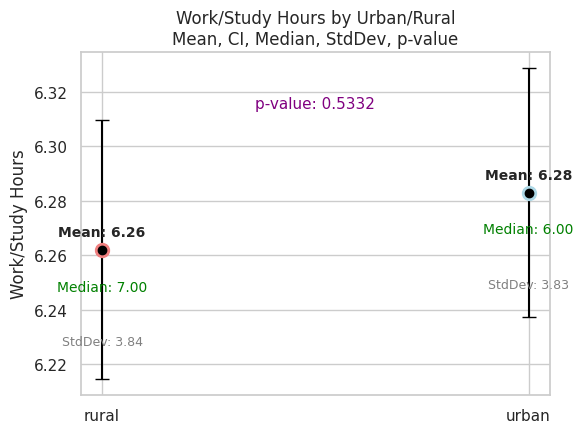

In [ ]:
# 27-4 - p-value 포함

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t, ttest_ind

# 1. 통계값 계산
grouped = df.groupby('urban_rural')['work_study_hours']
means = grouped.mean()
stds = grouped.std()
medians = grouped.median()
counts = grouped.count()

# 2. 신뢰구간 (95%)
conf_intervals = {}
for group in means.index:
    se = sem(df[df['urban_rural'] == group]['work_study_hours'])
    ci = t.ppf(0.975, df=counts[group] - 1) * se
    conf_intervals[group] = (means[group] - ci, means[group] + ci)

# 3. t-test
rural_vals = df[df['urban_rural'] == 'rural']['work_study_hours']
urban_vals = df[df['urban_rural'] == 'urban']['work_study_hours']
t_stat, p_value = ttest_ind(rural_vals, urban_vals)

# 4. 시각화
fig, ax = plt.subplots(figsize=(6, 4.5))

# 설정: rural 먼저
x_labels = ['rural', 'urban']
x_pos = [0, 1]
colors = {'rural': 'lightcoral', 'urban': 'lightblue'}

for i, group in enumerate(x_labels):
    x = x_pos[i]
    mean = means[group]
    ci = mean - conf_intervals[group][0]
    std = stds[group]
    median = medians[group]

    # 평균 및 신뢰구간
    ax.errorbar(x, mean, yerr=ci, fmt='o', color='black', capsize=5)
    ax.plot(x, mean, 'o', markersize=10, color=colors[group])

    # 텍스트: 평균, 중앙값, 표준편차
    ax.text(x, mean + 0.005, f"Mean: {mean:.2f}", ha='center', fontsize=10, fontweight='bold')
    ax.text(x, mean - 0.015, f"Median: {median:.2f}", ha='center', fontsize=10, color='green')
    ax.text(x, mean - 0.035, f"StdDev: {std:.2f}", ha='center', fontsize=9, color='gray')

# 5. p-value 그래프 상단 중앙에 표기
p_text = f"p-value: {p_value:.4f}"
ax.text(0.5, max(means) + 0.03, p_text, ha='center', va='bottom', fontsize=11, color='purple')

# 6. 그래프 설정
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Work/Study Hours")
ax.set_title("Work/Study Hours by Urban/Rural\nMean, CI, Median, StdDev, p-value")

plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()





- PointPlot 그래프 분석 :

| 항목          | Rural        | Urban        | 해석                  |
| ----------- | ------------ | ------------ | ------------------- |
| 평균 근무/학습 시간 | 약 6.26시간     | 약 6.28시간     | 매우 근접               |
| 신뢰구간(CI 범위) | 6.22 \~ 6.31 | 6.23 \~ 6.32 | 거의 겹침               |
| 유의미한 차이?    | ❌ 없음         | ❌ 없음         | ✅ **차이 없음으로 해석 가능** |


- 두 그룹의 평균 차이가 작고, 신뢰구간이 완전히 겹치므로,통계적으로 유의한 차이가 없다는 시사점 제공
   -  → 도시 유형은 work_study_hours에 큰 영향 없음

#  ViolinPlot :  Work/Study Hours 통계 요약 비교표 (Urban vs. Rural)


| 항목                    | **Rural**                    | **Urban**               | **해석 요약**                              |
| --------------------- | ---------------------------- | ----------------------- | -------------------------------------- |
| **평균 (Mean)**         | 6.26시간                       | 6.28시간                  | 평균은 거의 동일 (Urban이 소폭 높음)               |
| **중앙값 (Median)**      | 7.00시간                       | 6.00시간                  | ✅ Rural이 더 높음 → Urban은 상대적으로 분포 중심이 낮음 |
| **표준편차 (StdDev)**     | 3.84                         | 3.83                    | 분산(흩어짐)은 유사                            |
| **분포 모양 (Violin 모양)** | 오른쪽 치우침 (Right-skewed)       | 대체로 대칭형                 | Rural은 긴 시간대 응답 많음                     |
| **밀도 중심**             | 6\~10시간 중심                   | 5\~9시간 중심               | 응답 밀도가 분포의 중심을 시사                      |
| **해석 포인트**            | 평균보다 중앙값이 높음 → 일부 긴 시간대 영향 큼 | 평균과 중앙값이 비슷 → 상대적으로 대칭형 | ✅ 분포 차이가 존재함                           |



    - 평균은 유사하나 중앙값 차이와 분포 형태 차이가 존재
    - rural 지역은 장시간 근무/학습자 비율이 더 높을 가능성
    - 분포의 왜도 차이 → 단순 평균 비교보다 비모수 검정 또는 중앙값 중심 분석이 유리


<ipython-input-45-6cd991e20ddc>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(
<ipython-input-45-6cd991e20ddc>:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(
<ipython-input-45-6cd991e20ddc>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


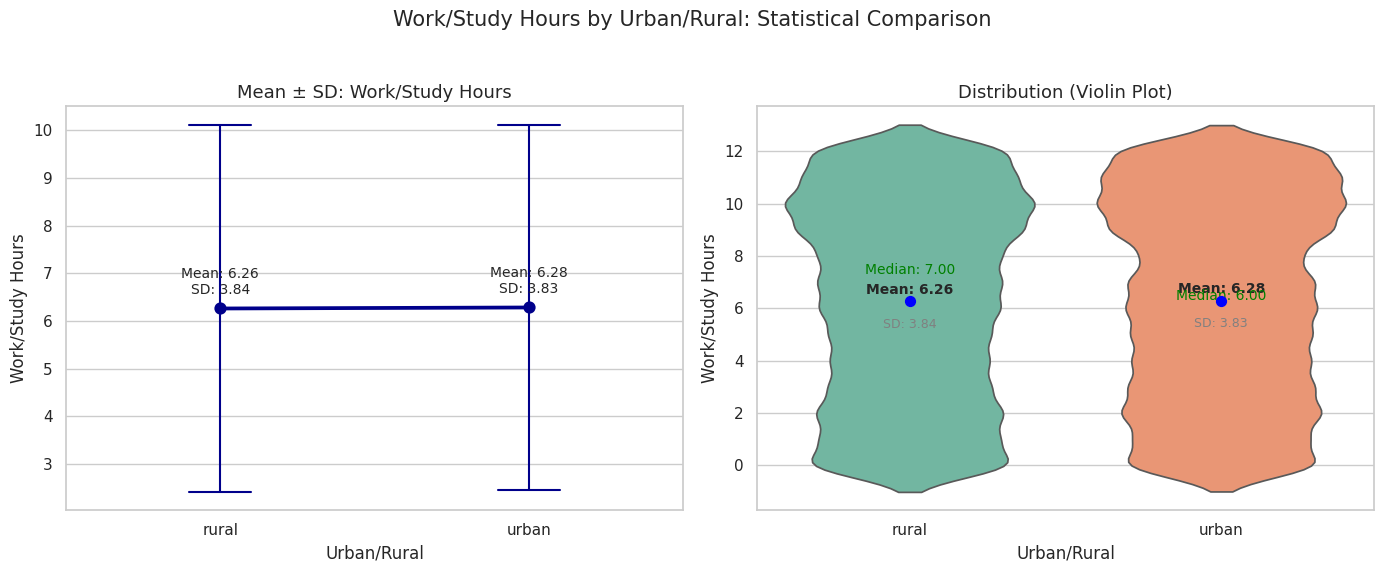

In [ ]:
# 28
# 왼쪽에는 pointplot (평균 ± 표준편차), 오른쪽에는 violinplot (분포와 평균/중앙값 표시) 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# figure 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# [1] Pointplot: 평균 ± 표준편차
sns.pointplot(
    data=df,
    x='urban_rural',
    y='work_study_hours',
    capsize=0.2,
    color='darkblue',
    markers='o',
    errwidth=1.5,
    ci='sd',
    ax=axes[0]
)

# 평균과 표준편차 표기
group_stats = df.groupby('urban_rural')['work_study_hours'].agg(['mean', 'std']).round(2)
for i, group in enumerate(group_stats.index):
    mean = group_stats.loc[group, 'mean']
    std = group_stats.loc[group, 'std']
    axes[0].text(i, mean + 0.3, f"Mean: {mean}\nSD: {std}", ha='center', fontsize=10)

axes[0].set_title("Mean ± SD: Work/Study Hours", fontsize=13)
axes[0].set_ylabel("Work/Study Hours")
axes[0].set_xlabel("Urban/Rural")

# [2] Violinplot: 분포 + 평균/중앙값 표기
sns.violinplot(
    data=df,
    x='urban_rural',
    y='work_study_hours',
    inner=None,
    palette='Set2',
    ax=axes[1]
)

# 평균, 중앙값, 표준편차 직접 표시
for i, group in enumerate(group_stats.index):
    subset = df[df['urban_rural'] == group]['work_study_hours']
    mean = subset.mean()
    median = subset.median()
    std = subset.std()

    axes[1].scatter(i, mean, color='blue', s=50, zorder=10)
    axes[1].text(i, mean + 0.3, f"Mean: {mean:.2f}", ha='center', fontsize=10, weight='bold')
    axes[1].text(i, median + 0.3, f"Median: {median:.2f}", ha='center', fontsize=10, color='green')
    axes[1].text(i, mean - 1, f"SD: {std:.2f}", ha='center', fontsize=9, color='gray')

axes[1].set_title("Distribution (Violin Plot)", fontsize=13)
axes[1].set_ylabel("Work/Study Hours")
axes[1].set_xlabel("Urban/Rural")

plt.suptitle("Work/Study Hours by Urban/Rural: Statistical Comparison", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [ ]:
# 29
# t_test - 'work_study_hours

independent_t_test(df, 'urban_rural', 'work_study_hours')


--- 'urban_rural' 그룹 간 'work_study_hours' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'work_study_hours' 평균: 6.26, (표준편차: 3.84, N=25072)
  'urban' 그룹 'work_study_hours' 평균: 6.28, (표준편차: 3.83, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 0.0866, p-value: 0.7685
  --> 분산이 동일하다는 가정 하에 t-검정 (Equal variances assumed)

 t-통계량: -0.6232, p-value (0.5332) : 'rural' 그룹과 'urban' 그룹의 'work_study_hours' 평균이 통계적으로 유의미하게 다르다고 말하기 어려움


<ipython-input-61-c423fdab4cee>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='urban_rural', y='work_study_hours',


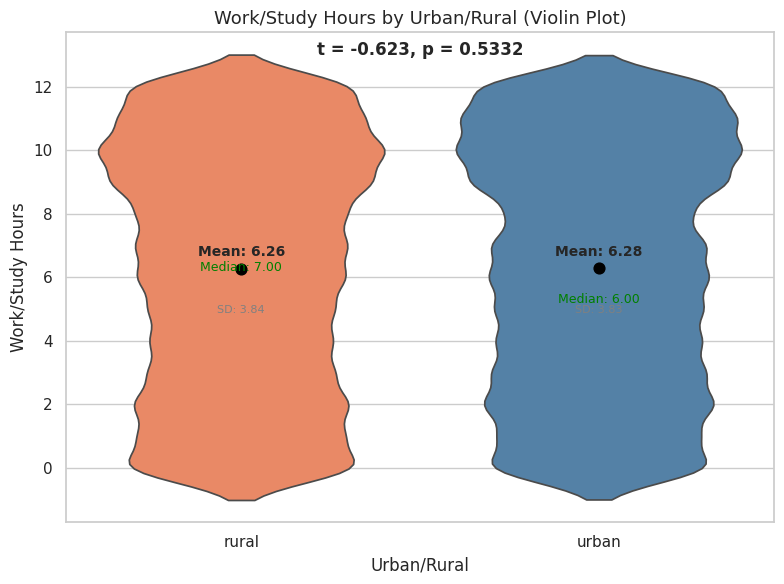

In [ ]:
# 29 -  work_study_hours

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

# 그룹 순서와 색상 지정
order = ['rural', 'urban']
palette = {'rural': 'coral', 'urban': 'steelblue'}

# 그룹별 데이터
group_rural = df[df['urban_rural'] == 'rural']['work_study_hours']
group_urban = df[df['urban_rural'] == 'urban']['work_study_hours']

# t-검정
t_stat, p_val = ttest_ind(group_rural, group_urban, equal_var=True)

# 통계값 요약
group_stats = df.groupby('urban_rural')['work_study_hours'].agg(['mean', 'median', 'std'])

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))

# [1] Violin Plot
sns.violinplot(data=df, x='urban_rural', y='work_study_hours',
               order=order, palette=palette, ax=ax, inner=None)

# [2] 평균/중앙값/표준편차 표시
for i, group in enumerate(order):
    subset = df[df['urban_rural'] == group]['work_study_hours']
    mean = subset.mean()
    median = subset.median()
    std = subset.std()

    ax.scatter(i, mean, color='black', s=60, label='Mean')
    ax.text(i, mean + 0.4, f"Mean: {mean:.2f}", ha='center', fontsize=10, fontweight='bold')
    ax.text(i, median - 0.8, f"Median: {median:.2f}", ha='center', color='green', fontsize=9)
    ax.text(i, mean - 1.4, f"SD: {std:.2f}", ha='center', color='gray', fontsize=8)

# [3] t-test 결과를 그래프 상단에 표시
t_text = f"t = {t_stat:.3f}, p = {p_val:.4f}"
ax.text(0.5, df['work_study_hours'].max() + 1, t_text,
        ha='center', fontsize=12, fontweight='bold', transform=ax.transData)

# 기타 스타일
ax.set_title("Work/Study Hours by Urban/Rural (Violin Plot)", fontsize=13)
ax.set_xlabel("Urban/Rural")
ax.set_ylabel("Work/Study Hours")
plt.tight_layout()
plt.show()


<ipython-input-66-369b8387d5c7>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=df, x='urban_rural', y='work_study_hours', join=False,
<ipython-input-66-369b8387d5c7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=df, x='urban_rural', y='work_study_hours', join=False,
<ipython-input-66-369b8387d5c7>:27: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='urban_rural', y='work_study_hours', join=False,
<ipython-input-66-369b8387d5c7>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot

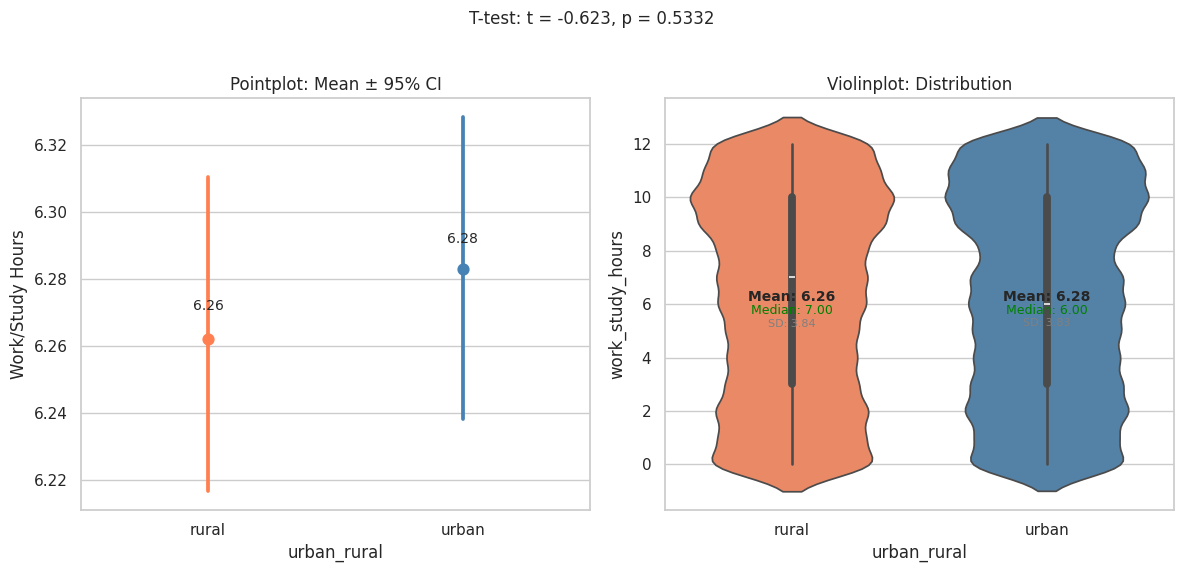

In [ ]:
# 30
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# [1] 데이터 불러오기


# [2] 그룹별 데이터 분리
group1 = df[df['urban_rural'] == 'rural']['work_study_hours'].dropna()
group2 = df[df['urban_rural'] == 'urban']['work_study_hours'].dropna()

# [3] t-test 계산
t_stat, p_val = ttest_ind(group1, group2)

# [4] 통계 요약 계산
summary = df.groupby('urban_rural')['work_study_hours'].agg(['mean', 'std', 'median']).round(2)

# [5] 색상 정의
colors = {'rural': 'coral', 'urban': 'steelblue'}

# [6] 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# [6-1] Pointplot
sns.pointplot(data=df, x='urban_rural', y='work_study_hours', join=False,
              ci=95, ax=axes[0], palette=colors)
axes[0].set_title('Pointplot: Mean ± 95% CI')
axes[0].set_ylabel('Work/Study Hours')

# 평균 값 텍스트 추가
for i, group in enumerate(['rural', 'urban']):
    axes[0].text(i, summary.loc[group, 'mean'] + 0.01,
                 f"{summary.loc[group, 'mean']:.2f}", ha='center', va='bottom', fontsize=10)

# [6-2] Violinplot
sns.violinplot(data=df, x='urban_rural', y='work_study_hours', ax=axes[1], palette=colors)
axes[1].set_title('Violinplot: Distribution')

# 평균, 중앙값, 표준편차 추가
for i, group in enumerate(['rural', 'urban']):
    mean = summary.loc[group, 'mean']
    std = summary.loc[group, 'std']
    median = summary.loc[group, 'median']
    axes[1].text(i, mean, f"Mean: {mean:.2f}", ha='center', va='center', fontsize=10, weight='bold')
    axes[1].text(i, mean - 0.5, f"Median: {median:.2f}", ha='center', va='center', fontsize=9, color='green')
    axes[1].text(i, mean - 1, f"SD: {std:.2f}", ha='center', va='center', fontsize=8, color='gray')

# [7] 상단 공통 제목에 t-test 결과 표시
fig.suptitle(f"T-test: t = {t_stat:.3f}, p = {p_val:.4f}", fontsize=12, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()



### 30 그래프 해석
      - 도시(urban)와 농촌(rural) 간의 일/학습 시간(work/study hours)의 평균과 분포는 매우 유사하며,
      - 평균(6.26 vs. 6.28)과 표준편차(3.84 vs. 3.83)의 차이는 미미함
      - 통계적으로도 유의미한 차이가 없으며(p = 0.533), 도시 유형은 학습시간에 영향을 주지 않는 것으로 해석

-----------------------------------
### 28 그래프 해석  - 상세
### 1. 분석 목적
두 그룹(urban vs. rural) 간 work_study_hours의 평균 차이가 통계적으로 유의한지를 확인하려는 것

    → 귀무가설(H₀): 두 그룹의 평균은 같다
    → 대립가설(H₁): 두 그룹의 평균은 다르다

### 2. 요약 통계량 (기술 통계)

| 그룹    | 평균   | 표준편차 | 샘플 수   |
| ----- | ---- | ---- | ------ |
| rural | 6.26 | 3.84 | 25,072 |
| urban | 6.28 | 3.83 | 26,808 |

      - 두 그룹의 평균 차이는 **0.02시간(약 1.2분)**로 실질적으로 매우 작음.


### 3. 등분산성 검정 (Levene’s Test)
      통계량: 0.0866   p-value: 0.7685 → p > 0.05    → 등분산 가정 충족 (Equal variances assumed)
      → 즉, 두 그룹의 분산이 통계적으로 유의미하게 다르지 않으므로 기본 t-test 적용 가능

### 4. 독립표본 t-검정 결과
      t-통계량: –0.6232   p-value: 0.5332   → p > 0.05 이므로 귀무가설 기각 실패

### 결론:
        두 그룹의 work_study_hours 평균은 통계적으로 유의하게 다르지 않음
        즉, 도시 유형(urban/rural)은 일·학습 시간에 의미 있는 차이를 만들지 않음




--------------------------
### 범주형 변수 분석 가능한 방법 정리 -sleep_duration, dietary_habits

| 분석 방법                    | 설명                                  | 적용 예시                                  |
| ------------------------ | ----------------------------------- | -------------------------------------- |
| 1. **빈도수/비율표**           | 각 범주의 개수와 전체 대비 비율 확인               | `'sleep_duration'`, `'dietary_habits'` |
| 2. **막대그래프 (countplot)** | 범주별 응답자 수 시각화                       | sleep 시간별, 식습관별                        |
| 3. **도시유형 등 그룹별 분할표**    | `urban_rural`, `gender` 등으로 교차빈도 비교 | `pd.crosstab()`                        |
| 4. **카이제곱 검정**           | 두 범주형 변수 간 독립성 검정                   | `sleep_duration` vs. `urban_rural`     |
| 5. **상대적 비율 히트맵**        | 그룹별 비율 비교 시각화                       | Seaborn의 `heatmap()`                   |
| 6. **표준화된 구성비 비교**       | 각 그룹의 범주 구성비 비교                     | 각 도시군의 식습관 유형비                         |
| 7. **Stacked bar chart** | 비율 or 빈도를 누적 막대형으로 표시               | 도시유형별 수면시간 분포                          |
| 8. **클러스터링/연관분석 (고급)**   | 범주형을 one-hot encoding 후 군집화         | 여러 생활패턴 변수 통합 분석 시                     |



In [ ]:
# 31
# 유일한 값만 리스트로 출력  - sleep_duration
df['sleep_duration'].unique()

array(['insufficient', 'optimal', 'excessive'], dtype=object)

In [ ]:
# 31-2
# 유일한 값만 리스트로 출력  - dietary_habits
df['dietary_habits'].unique()

array(['Unhealthy', 'Moderate', 'Healthy'], dtype=object)

In [ ]:
# 32
# 빈도수/비율표 - 'sleep_duration', 'dietary_habits

import pandas as pd

# 분석할 범주형 변수
cat_vars = ['sleep_duration', 'dietary_habits']

# 반복 출력
for col in cat_vars:
    print(f"\n🔷 {col.upper()} - Grouped by Urban/Rural")

    # ① 빈도수 표
    freq_table = pd.crosstab(df[col], df['urban_rural'])
    print("\n[빈도수]")
    print(freq_table)

    # ② 비율(%) 표: column-wise 비율
    ratio_table = pd.crosstab(df[col], df['urban_rural'], normalize='columns') * 100
    ratio_table = ratio_table.round(2)
    print("\n[비율 (%) 표]")
    print(ratio_table)



🔷 SLEEP_DURATION - Grouped by Urban/Rural

[빈도수]
urban_rural     rural  urban
sleep_duration              
excessive        5614   6609
insufficient    12689  13396
optimal          6769   6803

[비율 (%) 표]
urban_rural     rural  urban
sleep_duration              
excessive       22.39  24.65
insufficient    50.61  49.97
optimal         27.00  25.38

🔷 DIETARY_HABITS - Grouped by Urban/Rural

[빈도수]
urban_rural     rural  urban
dietary_habits              
Healthy          7626   8837
Moderate         8913   9031
Unhealthy        8533   8940

[비율 (%) 표]
urban_rural     rural  urban
dietary_habits              
Healthy         30.42  32.96
Moderate        35.55  33.69
Unhealthy       34.03  33.35


In [ ]:
# 32
# 카이검정 :  urban_rural, sleep_duration', 'dietary_habits

target_variables = ['sleep_duration', 'dietary_habits']

for var in target_variables:
    chi2_test(df, 'urban_rural', var)


카이제곱 통계량: 42.2019
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'sleep_duration'의 분포는 다름

카이제곱 통계량: 41.2926
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'dietary_habits'의 분포는 다름


In [ ]:
# 33
# t_test

independent_t_test(df, 'urban_rural', 'work_study_hours')


--- 'urban_rural' 그룹 간 'work_study_hours' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'work_study_hours' 평균: 6.26, (표준편차: 3.84, N=25072)
  'urban' 그룹 'work_study_hours' 평균: 6.28, (표준편차: 3.83, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 0.0866, p-value: 0.7685
  --> 분산이 동일하다는 가정 하에 t-검정 (Equal variances assumed)

 t-통계량: -0.6232, p-value (0.5332) : 'rural' 그룹과 'urban' 그룹의 'work_study_hours' 평균이 통계적으로 유의미하게 다르다고 말하기 어려움


### t-test - 제외함
- 연속형(수치형) 변수의 평균 차이를 비교할 때 사용하는 방법으로
- sleep_duration과 dietary_habits는 범주형 변수이므로 평균 비교 자체가 불가능하며, t-test 적용 대상이 아님


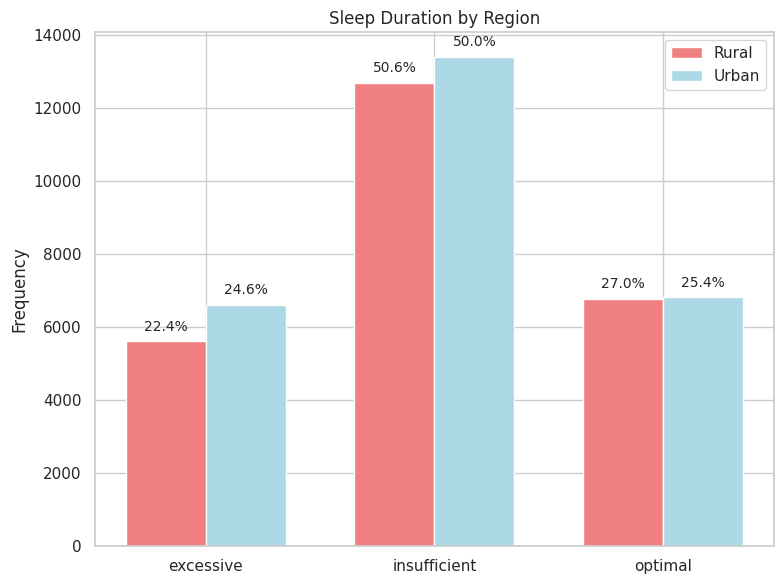

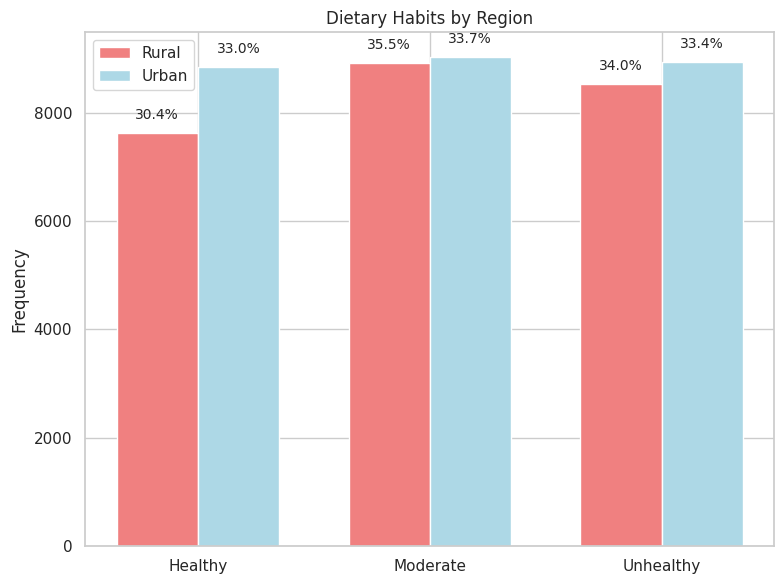

In [ ]:
# 34
# sleep_duration과 dietary_habits에 대한 지역별 빈도수 및 비율 시각화


import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# -----------------------------
# 1. 요약 테이블 생성 함수 정의
# -----------------------------
def frequency_ratio_summary(df, column_name):
    cross_tab = pd.crosstab(df['urban_rural'], df[column_name])
    freq_table = cross_tab.copy()
    freq_table['Total'] = freq_table.sum(axis=1)

    ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis=0).round(4)
    ratio_table['Total'] = ratio_table.sum(axis=1)

    chi2, p, dof, expected = chi2_contingency(cross_tab)

    summary_table = pd.DataFrame()
    for idx in cross_tab.index:
        row = {
            'Group': idx,
            **{f'{col}_freq': freq_table.loc[idx, col] for col in cross_tab.columns},
            **{f'{col}_ratio': ratio_table.loc[idx, col] for col in cross_tab.columns},
            'Total_freq': freq_table.loc[idx, 'Total'],
            'Chi-square': chi2,
            'p-value': p
        }
        summary_table = pd.concat([summary_table, pd.DataFrame([row])], ignore_index=True)

    return summary_table

# -----------------------------
# 2. 데이터프레임에서 요약 테이블 생성
# -----------------------------
summary_sleep = frequency_ratio_summary(df, 'sleep_duration')
summary_diet = frequency_ratio_summary(df, 'dietary_habits')

# -----------------------------
# 3. 라벨 추출
# -----------------------------
sleep_labels = [col.replace('_freq', '') for col in summary_sleep.columns if '_freq' in col and col != 'Total_freq']
diet_labels = [col.replace('_freq', '') for col in summary_diet.columns if '_freq' in col and col != 'Total_freq']

# -----------------------------
# 4. 시각화 함수 정의
# -----------------------------
def plot_freq_ratio(data, category_labels, colors, title, offset=200):
    fig, ax = plt.subplots(figsize=(8, 6))
    width = 0.35
    x_pos = range(len(category_labels))

    # 빈도와 비율 추출
    rural_freq = [data.loc[data['Group'] == 'rural', f"{label}_freq"].values[0] for label in category_labels]
    urban_freq = [data.loc[data['Group'] == 'urban', f"{label}_freq"].values[0] for label in category_labels]
    rural_ratio = [data.loc[data['Group'] == 'rural', f"{label}_ratio"].values[0] for label in category_labels]
    urban_ratio = [data.loc[data['Group'] == 'urban', f"{label}_ratio"].values[0] for label in category_labels]

    # 막대그래프 그리기
    bars1 = ax.bar([p - width/2 for p in x_pos], rural_freq, width, label='Rural', color=colors['rural'])
    bars2 = ax.bar([p + width/2 for p in x_pos], urban_freq, width, label='Urban', color=colors['urban'])

    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(category_labels)
    ax.legend()

    # 비율을 막대 위에 표시
    for bar, ratio in zip(bars1, rural_ratio):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + offset,
                f'{ratio:.1%}', ha='center', va='bottom', fontsize=10)

    for bar, ratio in zip(bars2, urban_ratio):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + offset,
                f'{ratio:.1%}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# -----------------------------
# 5. 색상 정의
# -----------------------------
colors = {
    'rural': 'lightcoral',
    'urban': 'lightblue'
}

# -----------------------------
# 6. 최종 실행 (그래프 출력)
# -----------------------------
plot_freq_ratio(summary_sleep, sleep_labels, colors, 'Sleep Duration by Region')
plot_freq_ratio(summary_diet, diet_labels, colors, 'Dietary Habits by Region')


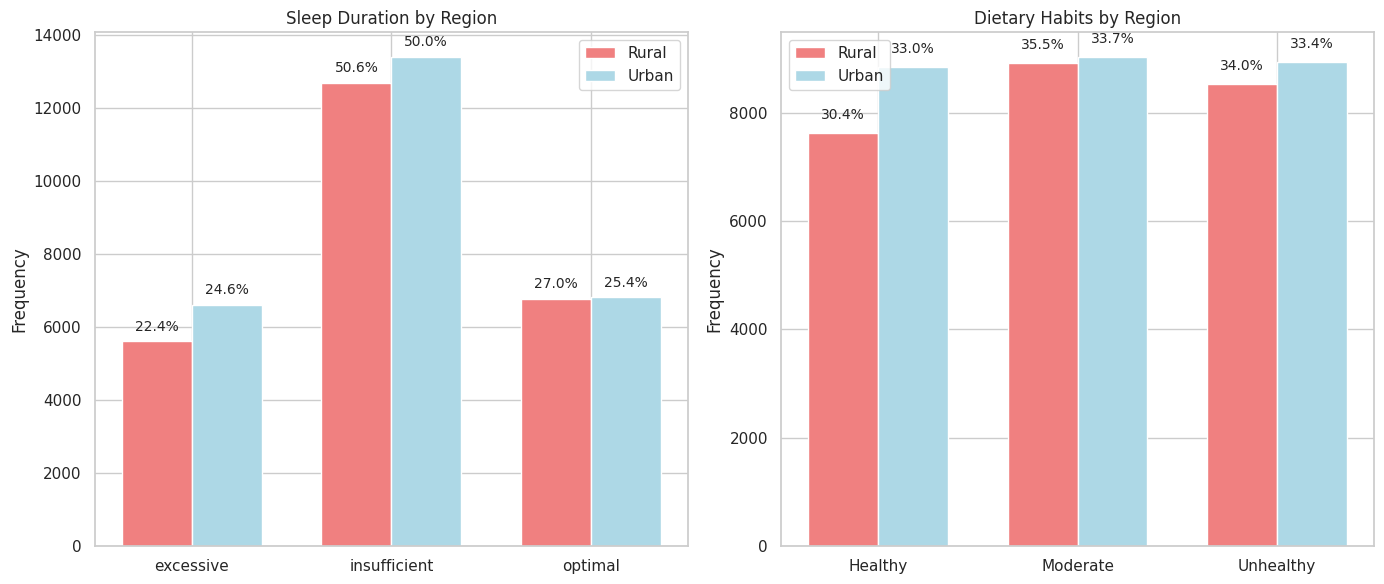

In [ ]:
# 34_2  - 나란히 옆으로 그리기

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# -----------------------------
# 1. 요약 테이블 생성 함수 정의
# -----------------------------
def frequency_ratio_summary(df, column_name):
    cross_tab = pd.crosstab(df['urban_rural'], df[column_name])
    freq_table = cross_tab.copy()
    freq_table['Total'] = freq_table.sum(axis=1)

    ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis=0).round(4)
    ratio_table['Total'] = ratio_table.sum(axis=1)

    chi2, p, dof, expected = chi2_contingency(cross_tab)

    summary_table = pd.DataFrame()
    for idx in cross_tab.index:
        row = {
            'Group': idx,
            **{f'{col}_freq': freq_table.loc[idx, col] for col in cross_tab.columns},
            **{f'{col}_ratio': ratio_table.loc[idx, col] for col in cross_tab.columns},
            'Total_freq': freq_table.loc[idx, 'Total'],
            'Chi-square': chi2,
            'p-value': p
        }
        summary_table = pd.concat([summary_table, pd.DataFrame([row])], ignore_index=True)

    return summary_table

# -----------------------------
# 2. summary 테이블 생성
# -----------------------------
summary_sleep = frequency_ratio_summary(df, 'sleep_duration')
summary_diet = frequency_ratio_summary(df, 'dietary_habits')

# -----------------------------
# 3. 범주 라벨 추출
# -----------------------------
sleep_labels = [col.replace('_freq', '') for col in summary_sleep.columns if '_freq' in col and col != 'Total_freq']
diet_labels = [col.replace('_freq', '') for col in summary_diet.columns if '_freq' in col and col != 'Total_freq']

# -----------------------------
# 4. 시각화 함수 - 두 그래프 나란히
# -----------------------------
def plot_two_side_by_side(data1, labels1, title1,
                          data2, labels2, title2,
                          colors, offset=200):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 나란히 그리기
    width = 0.35

    def plot_on_axis(ax, data, labels, title):
        x_pos = range(len(labels))
        rural_freq = [data.loc[data['Group'] == 'rural', f"{label}_freq"].values[0] for label in labels]
        urban_freq = [data.loc[data['Group'] == 'urban', f"{label}_freq"].values[0] for label in labels]
        rural_ratio = [data.loc[data['Group'] == 'rural', f"{label}_ratio"].values[0] for label in labels]
        urban_ratio = [data.loc[data['Group'] == 'urban', f"{label}_ratio"].values[0] for label in labels]

        bars1 = ax.bar([p - width/2 for p in x_pos], rural_freq, width, label='Rural', color=colors['rural'])
        bars2 = ax.bar([p + width/2 for p in x_pos], urban_freq, width, label='Urban', color=colors['urban'])

        ax.set_ylabel('Frequency')
        ax.set_title(title)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(labels)
        ax.legend()

        for bar, ratio in zip(bars1, rural_ratio):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + offset,
                    f'{ratio:.1%}', ha='center', va='bottom', fontsize=10)

        for bar, ratio in zip(bars2, urban_ratio):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + offset,
                    f'{ratio:.1%}', ha='center', va='bottom', fontsize=10)

    # 좌측 그래프: sleep
    plot_on_axis(axes[0], data1, labels1, title1)

    # 우측 그래프: diet
    plot_on_axis(axes[1], data2, labels2, title2)

    plt.tight_layout()
    plt.show()

# -----------------------------
# 5. 색상 정의 및 실행
# -----------------------------
colors = {'rural': 'lightcoral', 'urban': 'lightblue'}

plot_two_side_by_side(
    summary_sleep, sleep_labels, 'Sleep Duration by Region',
    summary_diet, diet_labels, 'Dietary Habits by Region',
    colors
)



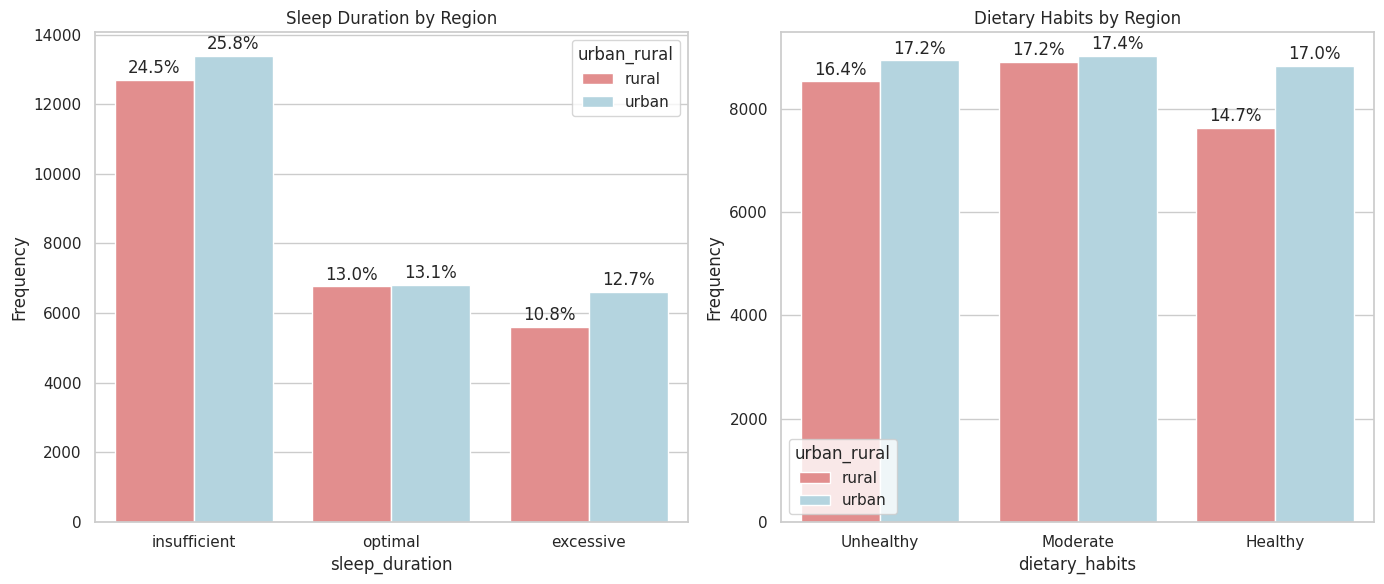

In [87]:
# 34-5 - 그래프 순서 바꾼 그래프

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (이미 df에 데이터가 있는 경우 생략 가능)
# df = pd.read_csv('df_final.csv')  # 파일 경로에 따라 수정

# sleep_duration, dietary_habits 순서 설정
df['sleep_duration'] = pd.Categorical(df['sleep_duration'], categories=['insufficient', 'optimal', 'excessive'], ordered=True)
df['dietary_habits'] = pd.Categorical(df['dietary_habits'], categories=['Unhealthy', 'Moderate', 'Healthy'], ordered=True)

# 색상 정의
palette = {'rural': 'lightcoral', 'urban': 'lightblue'}

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Sleep Duration 그래프
sns.countplot(data=df, x='sleep_duration', hue='urban_rural', palette=palette, ax=axes[0])
axes[0].set_title('Sleep Duration by Region')
axes[0].set_ylabel('Frequency')

total_count = len(df)
for container in axes[0].containers:
    labels = [f'{(bar.get_height()/total_count*100):.1f}%' for bar in container]
    axes[0].bar_label(container, labels=labels, padding=2)

# 2. Dietary Habits 그래프
sns.countplot(data=df, x='dietary_habits', hue='urban_rural', palette=palette, ax=axes[1])
axes[1].set_title('Dietary Habits by Region')
axes[1].set_ylabel('Frequency')

for container in axes[1].containers:
    labels = [f'{(bar.get_height()/total_count*100):.1f}%' for bar in container]
    axes[1].bar_label(container, labels=labels, padding=2)

plt.tight_layout()
plt.show()


----------------------------------
### 분석: 빈도, %, 카이검정 통계량 -  urban_rural, sleep_duration', 'dietary_habits

| 항목           | 설명                                                                      |
| ------------ | ----------------------------------------------------------------------- |
| **검정 대상**    | 도시 유형(`urban_rural`)과 생활습관 변수(`sleep_duration`, `dietary_habits`) 간의 관계 |
| **검정 방법**    | 카이제곱 독립성 검정 (범주형 변수 간 독립 여부 판단)                                         |
| **귀무가설(H₀)** | 두 변수는 서로 독립이다 (즉, 도시유형에 따라 수면/식습관 분포가 동일하다)                             |
| **대립가설(H₁)** | 두 변수는 독립이 아니다 (즉, 도시유형에 따라 분포가 다르다)                                     |

--------------------
① 수면 시간 (sleep_duration) vs. 도시유형 (urban_rural)

| 수면 유형                 | Rural (빈도) | Rural (%) | Urban (빈도) | Urban (%) | 해석 요약                       |
| --------------------- | ---------- | --------- | ---------- | --------- | --------------------------- |
| **Insufficient** (부족) | 12,689     | 50.61%    | 13,396     | 49.97%    | 양 그룹 모두 절반 수준. Rural이 소폭 높음 |
| **Optimal** (적절)      | 6,769      | 27.00%    | 6,803      | 25.38%    | Rural이 소폭 높음                |
| **Excessive** (과다)    | 5,614      | 22.39%    | 6,609      | 24.65%    | Urban이 높음 (수면과다 가능성)        |                                    |

--------------------
② 식습관 (dietary_habits) vs. 도시유형 (urban_rural)  

| 식습관 유형        | Rural (빈도) | Rural (%) | Urban (빈도) | Urban (%) | 해석 요약                    |
| ------------- | ---------- | --------- | ---------- | --------- | ------------------------ |
| **Healthy**   | 7,626      | 30.42%    | 8,837      | 32.96%    | Urban이 더 높음 (건강 식단 실천율↑) |
| **Moderate**  | 8,913      | 35.55%    | 9,031      | 33.69%    | Rural이 소폭 높음             |
| **Unhealthy** | 8,533      | 34.03%    | 8,940      | 33.35%    | 거의 유사함                   |
                                
--------------------
### 분석 : 도시유형(urban_rural)에 따른 수면시간 및 식습관 분포 차이 요약

| 변수               | 통계적 유의성 (χ², p)                      | 해석                          |
| ---------------- | ------------------------------------ | --------------------------- |
| `sleep_duration` |  있음 (**χ² = 42.2019, **p < 0.001**) | 도시유형별로 수면 시간 유형 분포가 유의하게 다름 |
| `dietary_habits` |  있음 (**χ² = 41.2928, **p < 0.001**) | 도시유형별로 식습관 유형 분포가 유의하게 다름   |
                          |

--------------------


- 종합 분석 :
      ① sleep_duration vs. urban_rural  : → p < 0.05이므로 귀무가설 기각
              → 도시유형(rural vs urban)에 따라 수면시간의 분포는 유의하게 다름
              → 즉, 수면 부족/적절/과다의 비율이 도시에 따라 달라진다는 의미
         
      ② dietary_habits vs. urban_rural : → p < 0.05이므로 귀무가설 기각
               → 도시유형에 따라 식습관의 구성비가 다르다
               → Urban이 상대적으로 Healthy 비율이 높고, Rural은 Moderate 비율이 더
                             

--------------------



-----------------------------------
### 1. 분석 목적
두 그룹(urban vs. rural) 간 work_study_hours의 평균 차이가 통계적으로 유의한지를 확인하려는 것

    → 귀무가설(H₀): 두 그룹의 평균은 같다
    → 대립가설(H₁): 두 그룹의 평균은 다르다

### 2. 요약 통계량 (기술 통계)

| 그룹    | 평균   | 표준편차 | 샘플 수   |
| ----- | ---- | ---- | ------ |
| rural | 6.26 | 3.84 | 25,072 |
| urban | 6.28 | 3.83 | 26,808 |

      - 두 그룹의 평균 차이는 **0.02시간(약 1.2분)**로 실질적으로 매우 작음.


### 3. 등분산성 검정 (Levene’s Test)
      통계량: 0.0866   p-value: 0.7685 → p > 0.05    → 등분산 가정 충족 (Equal variances assumed)
      → 즉, 두 그룹의 분산이 통계적으로 유의미하게 다르지 않으므로 기본 t-test 적용 가능

### 4. 독립표본 t-검정 결과
      t-통계량: –0.6232   p-value: 0.5332   → p > 0.05 이므로 귀무가설 기각 실패

### 결론:
        두 그룹의 work_study_hours 평균은 통계적으로 유의하게 다르지 않음
        즉, 도시 유형(urban/rural)은 일·학습 시간에 의미 있는 차이를 만들지 않음




# 라이프 스타일은 다르게 나오는 것이 좋음

### 스트레스지표 비교 - urban_rural 그룹별 work_study_pressure, financial_stress
- 지역별 스트레스 특성 : 평균 및 분포 비교      
- 스트레스 검정 (동일성)

In [ ]:
# 스트레스 지표는 다르게 나오는 것이 좋음
target_variables = ['work_study_pressure', 'financial_stress', 'work_study_satisfaction']

for var in target_variables:
    independent_t_test(df, 'urban_rural', var)


--- 'urban_rural' 그룹 간 'work_study_pressure' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'work_study_pressure' 평균: 3.04, (표준편차: 1.38, N=25072)
  'urban' 그룹 'work_study_pressure' 평균: 3.06, (표준편차: 1.41, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 15.3446, p-value: 0.0001
  --> 분산이 동일하지 않다는 가정 하에 t-검정 (Welch's t-test)

 t-통계량: -2.0729, p-value (0.0382) : 'rural' 그룹과 'urban' 그룹의 'work_study_pressure' 평균은 통계적으로 유의미하게 다릅니다.

--- 'urban_rural' 그룹 간 'financial_stress' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'financial_stress' 평균: 2.98, (표준편차: 1.41, N=25072)
  'urban' 그룹 'financial_stress' 평균: 3.02, (표준편차: 1.42, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 5.9641, p-value: 0.0146
  --> 분산이 동일하지 않다는 가정 하에 t-검정 (Welch's t-test)

 t-통계량: -3.5745, p-value (0.0004) : 'rural' 그룹과 'urban' 그룹의 'financial_stress' 평균은 통계적으로 유의미하게 다릅니다.

--- 'urban_rural' 그룹 간 'work_study_satisfaction' 평균 차이 독립표본 t-검정 ---

  'rural' 그룹 'work_study_satisfaction' 평균: 3.00, (표준편차: 1.39, N=25072)
  'urban' 그룹 'work_study_satisfaction' 평균: 2.

### 정신건강지표 비교 - urban_rural 그룹별 suidial_thoughts, depression
- 정신건강지표 특성 : 발생률(비율)비교, study_work_satisfaction의 평균 및 분포를 비교 (범주형 vs 범주형 : stacked bar chart)          
- 정신건강 검정(동일성)

In [ ]:
# 정신건강 지표는 다르게 나오는 것이 좋음 - 가설은 도시가 더 좋을 것이다.
# 스트레스 지표는 다르게 나오는 것이 좋음
target_variables = ['suicidal_thoughts', 'depression']

for var in target_variables:
    chi2_test(df, 'urban_rural', var)


카이제곱 통계량: 4.3372
p-value: 0.0373
'rural' 그룹과 'urban' 그룹에서 'suicidal_thoughts'의 분포는 다름

카이제곱 통계량: 65.1902
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'depression'의 분포는 다름


### 상관 분석
- urban_rural 그룹별 : sleep_duration, dietary_habits(수치화 후),work_study_hours 와 depression, suidial_thoughts, work_study_satisfaction 간의 상관관계              
- 전체 데이터에서의 상관관계                